In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import turtle

In [3]:
model1 = torch.hub.load('ultralytics/yolov5', 'yolov5m')

Using cache found in C:\Users\91789/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['ultralytics>=8.2.34'] not found, attempting AutoUpdate...
requirements: ❌ Command 'pip install --no-cache "ultralytics>=8.2.34" ' returned non-zero exit status 1.


YOLOv5  2024-7-11 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = 'img.jpg'

results = model1(img)
results.print()

image 1/1: 400x600 3 persons, 15 cars, 4 trucks
Speed: 103.5ms pre-process, 94.2ms inference, 146.7ms NMS per image at shape (1, 3, 448, 640)


In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    resize = cv2.resize(frame, (640, 640))
    # Make detections 
    results = model1(resize)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

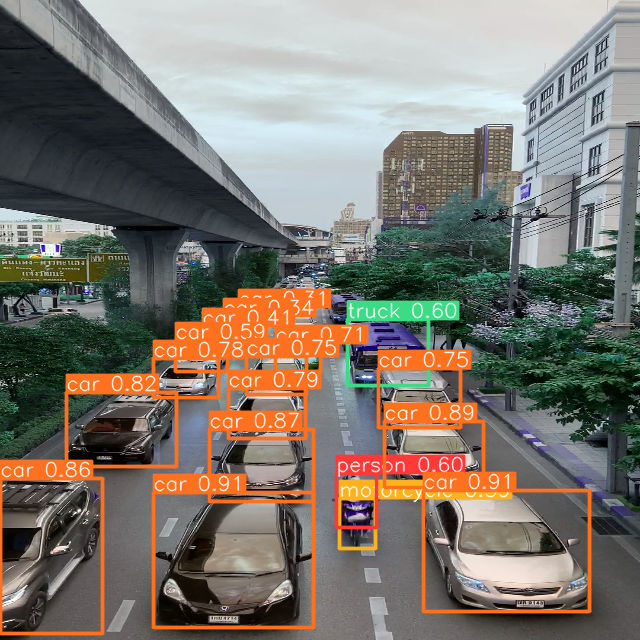

In [5]:
results.show()

In [10]:
#dataset
import uuid  
import os
import time

In [14]:

IMAGES_PATH = os.path.join('data', 'images') 
labels = [ 'Motorcycle']#[,'Car',  'Truck', 'Bus', 'Bicycle']
number_imgs = 5

In [17]:
cap = cv2.VideoCapture('1.mp4')

for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
   
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
       
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        #time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


In [40]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\Motorcycle.93e466a8-09d9-11ef-bb85-005056c00008.jpg


In [41]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\Motorcycle.9600db4e-09d9-11ef-ae48-005056c00008.jpg
data\images\Motorcycle.960174a7-09d9-11ef-ae26-005056c00008.jpg
data\images\Motorcycle.96017a8a-09d9-11ef-a5cb-005056c00008.jpg
data\images\Motorcycle.96017a8b-09d9-11ef-8c21-005056c00008.jpg
data\images\Motorcycle.96017a8c-09d9-11ef-b5cc-005056c00008.jpg


In [4]:
#Real Time Detections
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
#train
!cd Vehicle-Detection && python train.py --img 640 --batch 16 --epochs 1 --data dataset.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=30

fatal: ambiguous argument 'main..origin/master': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
YOLOv5  3a53f3d torch 2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4095.6875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
wandb: Currently logged in as: anand73382 (anand007). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in C:\Users\91789\OneDrive\Desktop\last_try\Vehicle-Detection\w


github: Command 'git rev-list main..origin/master --count' returned non-zero exit status 128.


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='Vehicle-Detection/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91789/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['ultralytics>=8.2.34', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
requirements: ❌ Command 'pip install --no-cache "ultralytics>=8.2.34" "setuptools>=70.0.0" ' returned non-zero exit status 1.


YOLOv5  2024-8-27 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 308 layers, 21053802 parameters, 0 gradients
Adding AutoShape... 


In [6]:
img = 'img3.jpg'

results = model(img)
results.print()

image 1/1: 864x1276 21 Cars, 2 Motorcycles, 1 Truck, 1 Bus
Speed: 229.4ms pre-process, 105.8ms inference, 199.6ms NMS per image at shape (1, 3, 448, 640)


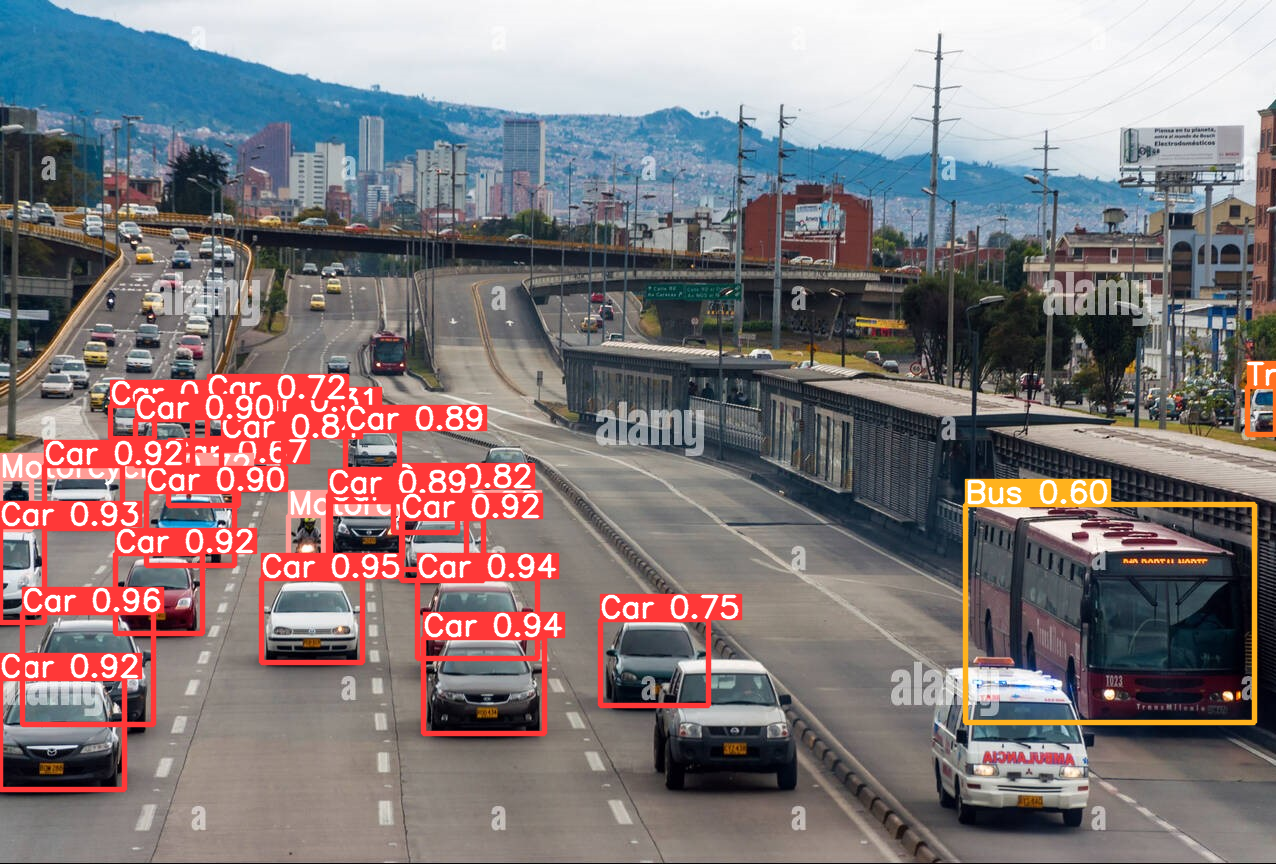

In [7]:
results.show()

In [12]:
results.print()

image 1/1: 360x640 7 Cars, 9 Motorcycles, 3 Trucks, 1 Bus
Speed: 0.0ms pre-process, 0.0ms inference, 24.2ms NMS per image at shape (1, 3, 384, 640)


In [33]:
df = results.pandas().xyxy[0]
df  

,xmin,ymin,xmax,ymax,confidence,class,name
0,284.106140,256.253174,343.737183,303.392700,0.949278,0,Car
1,367.837189,246.697586,427.191040,297.407318,0.944458,0,Car
2,210.067795,154.048126,227.689774,167.711960,0.926783,0,Car
3,240.264542,217.333893,275.480194,246.301987,0.923816,0,Car
4,347.112213,200.970337,388.469055,235.260880,0.903573,0,Car
5,211.204376,273.444794,266.041138,317.387482,0.902244,0,Car
6,281.129700,332.892059,353.433533,391.537781,0.894761,0,Car
7,562.973572,177.950745,590.421326,197.656769,0.865146,0,Car
8,215.653610,243.218811,260.370483,275.515564,0.817457,0,Car
9,295.060181,228.753433,333.816956,256.873169,0.801844,0,Car


In [8]:
cap = cv2.VideoCapture("13.mp4")
while cap.isOpened():
    ret, frame = cap.read( )
    resize = cv2.resize(frame, (640, 640))
    results = model(resize)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [34]:
import pandas as pd
df1 = pd.DataFrame(df['class'])
df1

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [35]:
df1.iloc[0,0]

0

In [39]:
i=0
class_names = [ 'Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle'] 
vehicle_counts = {class_name: 0 for class_name in class_names}
class_names[0]

'Car'

In [40]:
while i < len(df):
        class_index = df1.iloc[i,0]
        class_name = class_names[class_index]
        vehicle_counts[class_name] += 1
        i+=1

In [41]:
vehicle_counts

{'Car': 17, 'Motorcycle': 2, 'Truck': 2, 'Bus': 0, 'Bicycle': 0}

In [42]:
x = vehicle_counts.keys()
x

dict_keys(['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle'])

In [43]:
car = vehicle_counts.get('Car')
motorcycle = vehicle_counts.get('Motorcycle')
truck = vehicle_counts.get('Truck')
bus = vehicle_counts.get('Bus')
bicycle = vehicle_counts.get('Bicycle')

In [12]:
#app-2
import time
for i in range(1,5):
    start = time.time()
    cap = cv2.VideoCapture("1"+str(i)+".mp4")
    while cap.isOpened():
        ret, frame = cap.read()
        resize = cv2.resize(frame, (640, 640))
         # Make detections
        results = model(resize)
        cv2.imshow('YOLO', np.squeeze(results.render())) 
        df = results.pandas().xyxy[0]
        le=len(df['class'])
        print(le)
        end = time.time()
        print(end -start)
        it = end - start
        if (cv2.waitKey(10) & 0xFF == ord('q')) :
            break
        if (le<3):
            break
        if (it>=10):
            break 
    cap.release()
    cv2.destroyAllWindows()
    time.sleep(3)

5
1.8673005104064941
5
1.979323387145996
4
2.091425895690918
6
2.2441678047180176
5
2.4602184295654297
6
2.572531223297119
6
2.6845719814300537
5
2.824925184249878
5
2.9970924854278564
4
3.1574904918670654
4
3.28564453125
3
3.4380531311035156
5
3.6301798820495605
5
3.774299144744873
5
3.878330945968628
6
3.9824376106262207
5
4.086508274078369
6
4.1988019943237305
3
4.319246768951416
3
4.430787563323975
4
4.534962892532349
4
4.647621154785156
4
4.751120328903198
4
4.847313642501831
6
4.951252460479736
5
5.0552637577056885
5
5.159295558929443
5
5.335521697998047
5
5.51241397857666
7
5.697362899780273
6
5.865912914276123
6
6.034175395965576
4
6.1948418617248535
5
6.371217250823975
6
6.53940224647522
4
6.715559720993042
6
6.9089508056640625
6
7.061366558074951
5
7.181384086608887
7
7.3015456199646
7
7.397888660430908
9
7.501958847045898
6
7.614442586898804
7
7.71154522895813
7
7.816684722900391
7
7.921562433242798
7
8.026079416275024
8
8.132117986679077
7
8.22667908668518
8
8.3227901458740

In [7]:
import time
start = time.time()
cap = cv2.VideoCapture("13.mp4")
while cap.isOpened():
        ret, frame = cap.read()
         # Make detections
        resize = cv2.resize(frame, (640, 640))
        results = model(resize)
        cv2.imshow('YOLO', np.squeeze(results.render())) 
#         time.sleep(3)
        df = results.pandas().xyxy[0]
        le=len(df['class'])
        print(le)
        end = time.time()
        print(end -start)
        it = end - start
        if (cv2.waitKey(10) & 0xFF == ord('q')) :
            break
        #if (le<3):
        #    break
        if (it>=20):
            break 
cap.release()
cv2.destroyAllWindows()      

17
0.45190906524658203
17
0.5344843864440918
16
0.6080918312072754
17
0.682772159576416
19
0.7673864364624023
18
0.8753914833068848
18
0.9467220306396484
16
1.020676851272583
16
1.1031827926635742
19
1.1847543716430664
16
1.2599124908447266
19
1.3294906616210938
19
1.4108526706695557
17
1.4930591583251953
17
1.563288688659668
17
1.639876365661621
17
1.7029647827148438
18
1.7802951335906982
18
1.8570809364318848
16
1.9233314990997314
16
2.032665252685547
17
2.10853910446167
15
2.170064926147461
15
2.2367680072784424
16
2.3108973503112793
16
2.3767147064208984
17
2.458671808242798
17
2.529895305633545
17
2.5943522453308105
16
2.6588897705078125
16
2.7331936359405518
16
2.810959577560425
16
2.88783860206604
16
2.9509644508361816
16
3.0369772911071777
17
3.1326096057891846
18
3.206939220428467
18
3.2792892456054688
18
3.3439300060272217
18
3.4208617210388184
18
3.4853339195251465
17
3.564068078994751
18
3.6378445625305176
19
3.7355008125305176
19
3.8098185062408447
18
3.8936076164245605
17

In [6]:
list_numberOfVehiclePassed = []
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render())) 
    
    df = results.pandas().xyxy[0]
    
    for i in df['name']: 
        list_numberOfVehiclePassed.append(i)
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [203]:
df = results.pandas().xyxy[0]

In [68]:
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,525.814087,654.227417,745.656616,786.088013,0.958906,0,Car
1,347.267395,618.367859,617.141602,775.928833,0.956175,0,Car
2,727.244507,652.485474,929.436523,791.458740,0.929474,2,Truck
3,918.515869,569.791016,992.506104,639.420349,0.850215,0,Car
4,769.045898,597.347900,879.961487,662.737244,0.753696,0,Car
5,735.694885,652.178406,928.242737,790.595032,0.649541,0,Car
6,869.446777,611.972778,980.295898,702.448120,0.572767,0,Car
7,679.864319,613.713623,800.425415,695.878601,0.316233,0,Car
8,235.236969,355.692383,1708.808716,1021.850098,0.308543,0,Car


In [11]:
results.render()